In [39]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc
from mpmath import *
mp.dps = 15; mp.pretty = True

# Table of contents

1. [Plotting graphs for unsteady mode of filtrarion](#part1)
  - [Depression cone. Graph of reservoir pressure dependence on distance for a given time moment.](#section1)
  - [Bottomhole pressure variation. Graph of bottomhole pressure dependence on time.](#section2)
  - [Bottomhole pressure variation in semi-logarithmic coordinates over time.](#section3)
  - [Change of depression on the reservoir and logarithmic derivative of depression from time in double logarithmic coordinates.](#section4)

2. [Logarithmic approximation of the linear flow solution](#part2)

3. [Advanced solutions to the filtration equations](#part3)

## Plotting graphs for unsteady mode of filtrarion <a class="anchor" id="part1"></a>

### Depression cone. Graph of reservoir pressure dependence on distance for a given moment of time (for several moments of time simultaneously) <a class="anchor" id="section1"></a>

For steady-state filtration mode the pressure in the formation does not change. For pseudo steady-state mode, the pressure drop between the formation and the bottomhole remains constant. After starting, stopping or changing the well operation mode, these conditions are not met. The pressure at different points in the formation may change differently. Such a mode is called unsteady, and the solutions describing it are non-stationary (time-dependent).

For practical calculations we will use dimensionless variables obtained for practical metric units of measurement.

$$ r_D = \frac{r}{r_w} $$
$$ t_D = \frac{0.00036 kt}{\phi \mu c_t r_w^2}$$
$$ p_D = \frac{kh}{ 18.41 q_s B \mu} \left( p_i - p_{wf} \right) $$

* $q_s$ - well flow rate at the surface, reduced to normal conditions m3/day
* $\phi$ - porosity, fractions of units
* $\mu$ - viscosity of oil in the formation, cP
* $B$ - oil volume factor, m3/m3
* $p_i$ - initial pressure in the formation, atm
* $p_{wf}$ - bottomhole pressure, atm
* $c_t$ - total compressibility of the system in the reservoir, 1/atm

Solution of the linear flow
$$ p_D(r_D,t_D) = - \frac{1}{2} Ei \left(- \dfrac{ r_D^2}{4t_d} \right)$$

where -Ei(-x) is an integral exponential function.

$$Ei(x)=-\int\int\limits_{x}^{\infty}\frac{e^{-t}}{t}\,\mathrm dt=\gamma+\operatorname{ln}|-x||+\sum\limits_{n\ge1}\frac{{-x}^n}{n!\cdot n}, \; x\in\mathbb R$$

In [40]:
#Dimensionless radius
def rd (r_m,rw_m = 0.1):
  return r_m/rw_m

In [41]:
#Dimensionless time
def td (t, k_mD = 50,
        fi = 0.2,
        mu_cP = 2,
        ct = 10**(-5),
        rw_m = 0.1):
  """
  ct - total compressibility of the system in the reservoir, 1/atm
  fi - porosity, fractions of units
  t - time, days
  mu_cP - oil viscosity (in reservoir conditions)
  k_mD - reservoir permeability
  r_m - distance from bottom hole
  rw_m - well radius
"""
  return 0.00036*k_mD*t/(fi*mu_cP*ct*rw_m**2)

In [42]:
# Solving the linear flow of the filtration equation
def pd (rd, td):
  return -1/2*sc.expi(-rd**2 / 4 / td)

In [43]:
def p_wf_atma (pd, p_res_atma = 250,
               q_liq_sm3day = 80,
               k_mD = 50,
               b_m3m3 = 1.2,
               mu_cP = 2,
               h_m = 15):
  """
  p_res_atma - reservoir pressure, pressure at the supply circuit
  q_liq_sm3day - liquid flow rate at the surface in standard conditions
  mu_cP - oil viscosity (in reservoir conditions)
  B_m3m3 - oil volume factor
  k_mD - reservoir permeability
  h_m - reservoir capacity
"""
  return p_res_atma-pd*q_liq_sm3day*b_m3m3*mu_cP*18.41/(k_mD*h_m)


- Graph of reservoir pressure vs. distance at a given point in time (t=100 h)

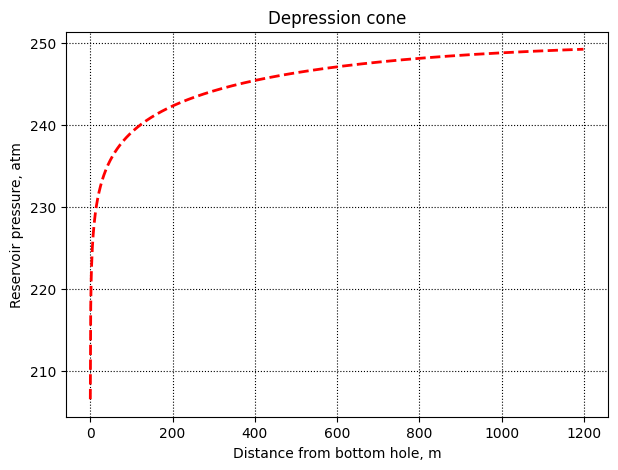

In [44]:
x = np.arange(0000.1, 1200, 1)
t=100 #hours
y = p_wf_atma (pd(rd(r_m=x),td(t)))
plt.rcParams['figure.figsize'] = [7, 5]
plt.plot(x, y,
        linestyle = '--',
        linewidth = 2,
        color = 'red')
plt.title('Depression cone')
plt.xlabel('Distance from bottom hole, m')
plt.grid(which='major',
         color = 'black',
         linestyle = ':')
plt.ylabel('Reservoir pressure, atm')
plt.show()

- Graph of reservoir pressure versus distance for several time points


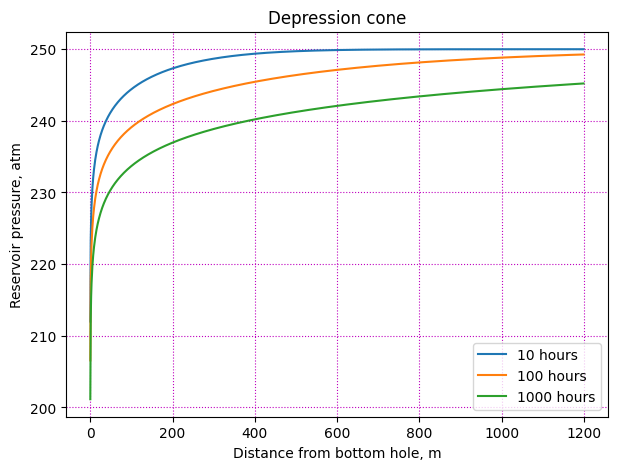

In [45]:
x = np.arange(0.1, 1200, 1)
plt.rcParams['figure.figsize'] = [7, 5]
plt.plot(x, p_wf_atma (pd(rd(r_m=x),td(t=10))), label='10 hours')
plt.plot(x, p_wf_atma (pd(rd(r_m=x),td(t=100))), label='100 hours')
plt.plot(x, p_wf_atma (pd(rd(r_m=x),td(t=1000))), label='1000 hours')
plt.title('Depression cone')
plt.xlabel('Distance from bottom hole, m')
plt.grid(which='major',
        color = 'm',
        linestyle = ':')
plt.ylabel('Reservoir pressure, atm')
plt.legend()
plt.show()

###2. Graph of bottomhole pressure variation. Graph of bottomhole pressure dependence on time (for several permeability values simultaneously). <a class="anchor" id="section2"></a>

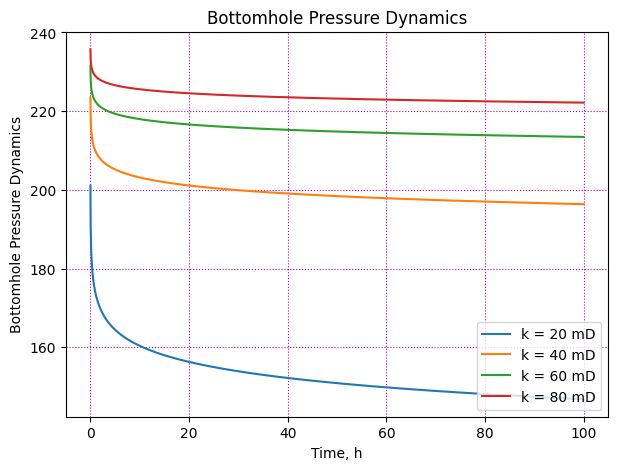

In [46]:
x = np.arange(0.01, 100, 1e-2)
plt.rcParams['figure.figsize'] = [7, 5]
r_m=0.1 #calculated radius equals the radius of the well
plt.plot(x, p_wf_atma (pd(rd(r_m),td(t=x, k_mD=20)),k_mD=20), label='k = 20 mD')
plt.plot(x, p_wf_atma (pd(rd(r_m),td(t=x, k_mD=40)),k_mD=40), label='k = 40 mD')
plt.plot(x, p_wf_atma (pd(rd(r_m),td(t=x, k_mD=60)),k_mD=60), label='k = 60 mD')
plt.plot(x, p_wf_atma (pd(rd(r_m),td(t=x, k_mD=80)),k_mD=80), label='k = 80 mD')

plt.title('Bottomhole Pressure Dynamics')
plt.xlabel('Time, h')
plt.grid(which='major',
        color = 'm',
        linestyle = ':')
plt.ylabel('Bottomhole Pressure Dynamics')
plt.legend(loc='lower right')
plt.show()

### 3. Graph of bottomhole pressure variation in semi-logarithmic coordinates over time (for several permeability values simultaneously) <a class="anchor" id="section3"></a>


Graphs similar to the logarithm turn into a straight line when displayed in semi-logarithmic coordinates. Therefore, these graphs are popular in analyzing hydrodynamic studies.

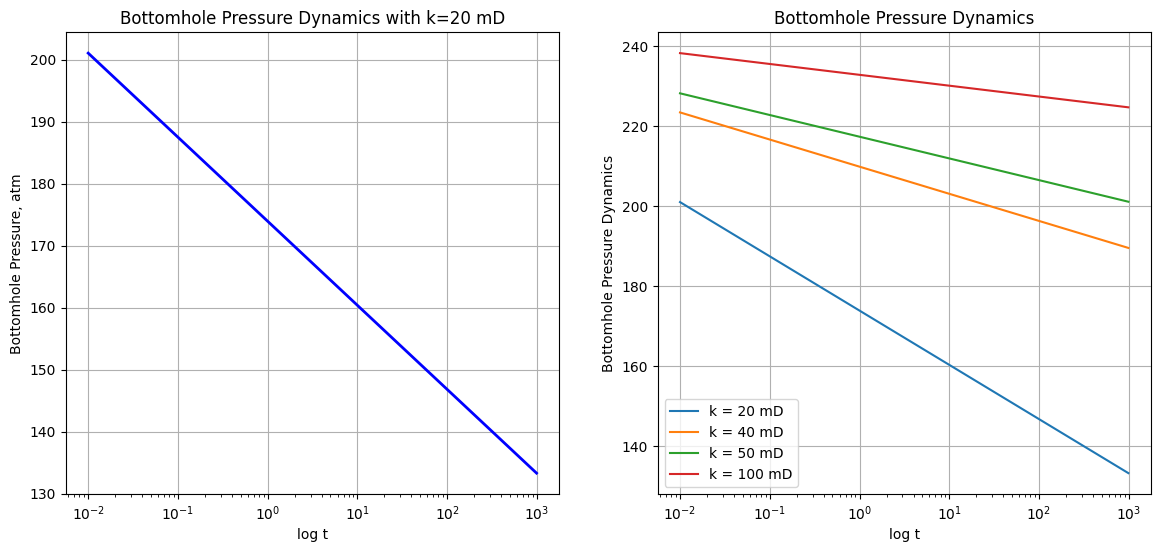

In [47]:
x = np.arange(0.01, 1000, 10)
plt.rcParams['figure.figsize'] = [14, 6]
fig, (ax2,ax1) = plt.subplots(1,2)
r_m=0.1

#double set the permeability, since it changes in both the pd and td functions
ax1.plot(x, p_wf_atma (pd(rd(r_m),td(t=x, k_mD=20)),k_mD=20), label='k = 20 mD')
ax1.plot(x, p_wf_atma (pd(rd(r_m),td(t=x, k_mD=40)),k_mD=40), label='k = 40 mD')
ax1.plot(x, p_wf_atma (pd(rd(r_m),td(t=x, k_mD=50)),k_mD=50), label='k = 50 mD')
ax1.plot(x, p_wf_atma (pd(rd(r_m),td(t=x, k_mD=100)),k_mD=100), label='k = 100 mD')
ax1.set(title="Bottomhole Pressure Dynamics")
ax1.set_xlabel('log t')
ax1.set_ylabel('Bottomhole Pressure Dynamics')
ax1.set_xscale('log')
ax1.grid()
ax1.legend()

ax2.plot(x, p_wf_atma (pd(rd(r_m),td(t=x, k_mD=20)),k_mD=20), label='k = 20 мД',
        linewidth = 2,
        color = 'blue')
ax2.set(title="Bottomhole Pressure Dynamics with k=20 mD")
ax2.set_xlabel('log t')
ax2.set_ylabel('Bottomhole Pressure, atm')
ax2.set_xscale('log')
ax2.grid()

plt.show()

### 4. Graph of change of depression on the reservoir and logarithmic derivative of depression from time in double logarithmic coordinates. <a class="anchor" id="section4"></a>

Graphs in double logarithmic coordinates are also very popular when interpreting a hydrodynamic model.

Such plots have several useful properties.
1. Degree dependencies will translate into straight lines. A function of the form
$y=x^a$ is transformed to the form $ln(y) = a \cdot ln(x)$ when both parts of the equality are logarithmized, which corresponds to a straight line on a log-log plot with the slash $a$.
2. Dependencies of the form $y = a \cdot f(b \cdot x)$ are transformed by logarithmization to the form $ln(y) = ln(a) + ln(f(e^{ln(b) + ln(x)}))$ or $ln(y) = ln(a) + g({ln(b) + ln(x)})$ where $g(z) = ln(f(e^z))$. Thus, for an arbitrary function, when mapping it in log-log coordinates, the multipliers of the argument and the function itself are transformed into shifts of some function $g$, which remains unchanged. Due to this, comparing different representations of functions differing in multipliers - they can be calculated by determining the values of shifts.

In [48]:
def rd (r_m,rw_m = 0.1):
  return r_m/rw_m

def td (t, k_mD = 50,
        fi = 0.2,
        mu_cP = 2,
        ct = 10**(-5),
        rw_m = 0.1):
  return 0.00036*k_mD*t/(fi*mu_cP*ct*rw_m**2)

def pd (rd, td):
  return -1/2*sc.expi(-rd**2 / 4 / td)


def depress_atma (pd, p_res_atma = 250,
               q_liq_sm3day = 80,
               k_mD = 50,
               b_m3m3 = 1.2,
               mu_cP = 2,
               h_m = 15):

  return pd*q_liq_sm3day*b_m3m3*mu_cP*18.41/(k_mD*h_m)


The logarithmic derivative of pressure is often used in the interpretation of hydrodynamic well studies.

$$\frac{dP}{d\ln t} = t\frac{dP}{d t}$$.

plot the pressure drop and the derivative of the pressure drop


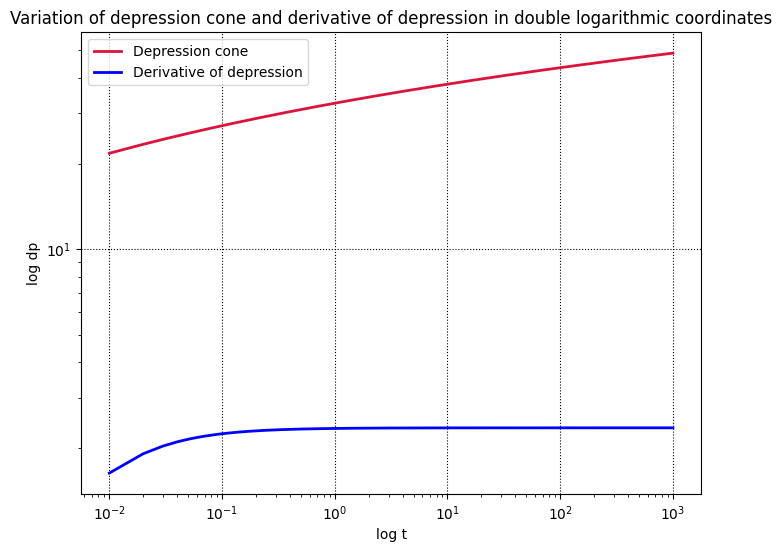

In [49]:
x = np.arange(0.01, 1000, 0.01)
plt.rcParams['figure.figsize'] = [8, 6]
fig, (ax1) = plt.subplots(1,1)
ax1.plot(x, depress_atma (pd(rd(r_m=0.1),td(t=x))),label='Depression cone',
        linestyle = '-',
        linewidth = 2,
        color = 'crimson')
ax1.plot(x[:-1], np.diff(depress_atma(pd(rd(r_m=0.1),td(t=x))))/np.diff(x)*x[:-1],label='Derivative of depression',
        linestyle = '-',
        linewidth = 2,
        color = 'blue')

ax1.set(title='Variation of depression cone and derivative of depression in double logarithmic coordinates')

ax1.set_xlabel('log t')
ax1.set_ylabel('log dp')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend()
ax1.grid(which='major',
        color = 'black',
        linestyle = ':')


## Logarithmic approximation of the linear flow solution <a class="anchor" id="part2"></a>

Solving a linear runoff for the integral exponent function in dimensional variables:
$$p(r,t)=p_{i}-\frac{18.41 q_s \mu B}{k h} \left( -\frac{1}{2} E_{i} \left( \frac{-\phi \mu c_t r^2}{0.00144 k t}\right)\right)$$

Logarithmic approximation of a linear stock solution in dimensional variables:

$$p(r,t)=p_{i}-\frac{9.205 q_s \mu B}{k h} \left( ln \left( \frac{ k t}{\phi \mu c_t r^2} \right)- 7.12\right)$$

In [50]:
#Linear flow solution
def pd(t=100,
       r_m=0.1,
       p_i_atma=250,
       q_liq_sm3day=35,
       b_m3m3=1.2,
       k_mD=50,
       h_m =15,
       mu_cP=2,
       ct=1e-5,
       fi=0.2):
  return  p_i_atma - 18.41 * q_liq_sm3day * b_m3m3 * mu_cP / k_mD / h_m *(-1/2*sc.expi(-(fi*mu_cP*ct*r_m**2/(0.00144*k_mD*t))))

In [51]:
#Logarithmic approximation
def pd_log(t=100,
       r_m=0.1,
       p_i_atma=250,
       q_liq_sm3day=35,
       b_m3m3=1.2,
       k_mD=50,
       h_m =15,
       mu_cP=2,
       ct=1e-5,
       fi=0.2):
  return  p_i_atma - 9.205 * q_liq_sm3day * b_m3m3 * mu_cP / k_mD / h_m *(np.log(k_mD*t/(fi*mu_cP*ct*r_m**2))-7.12)

Plot the graphs in **common coordinates**

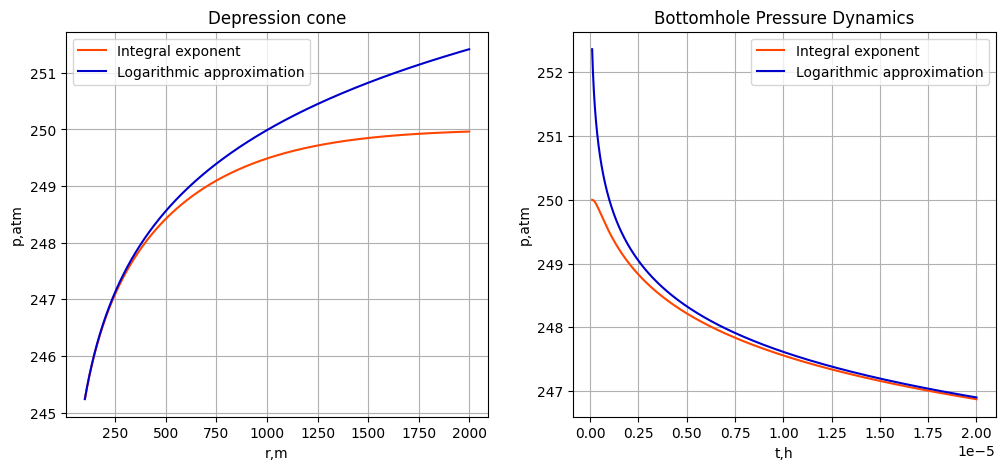

In [52]:
rr=np.arange(100,2000,1)
tt = np.arange(0.0000001, 0.00002, 1e-8)
plt.rcParams['figure.figsize'] = [12, 5] #set graph size

fig, (ax1, ax2) = plt.subplots(1,2)

#Graph for the depression funnel
ax1.plot(rr, pd(r_m = rr), label = 'Integral exponent', color = 'orangered')
ax1.plot(rr, pd_log(r_m = rr), label = 'Logarithmic approximation', color = 'mediumblue')
ax1.set(title='Depression cone')
ax1.set_xlabel("r,m")
ax1.set_ylabel("p,atm")
ax1.legend()
ax1.grid()

#Graph for downhole pressure dynamics
ax2.plot(tt, pd(t=tt), label = 'Integral exponent', color = 'orangered')
ax2.plot(tt, pd_log(t=tt), label = 'Logarithmic approximation', color = 'mediumblue')
ax2.set(title="Bottomhole Pressure Dynamics")
ax2.set_xlabel("t,h")
ax2.set_ylabel("p,atm")
ax2.legend()
ax2.grid()

plt.show()

Plot the graphs in **semi-logarithmic coordinates**

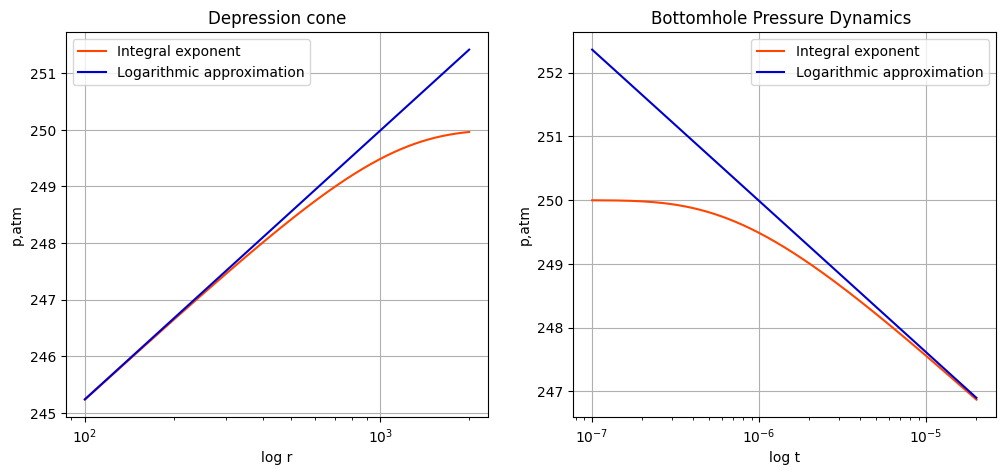

In [53]:
rr=np.arange(100,2000,1)
tt = np.arange(0.0000001, 0.00002, 1e-8)
plt.rcParams['figure.figsize'] = [12, 5]

fig, (ax1, ax2) = plt.subplots(1,2)

#Graph for the depression funnel
ax1.plot(rr, pd(r_m = rr), label = 'Integral exponent', color = 'orangered')
ax1.plot(rr, pd_log(r_m = rr), label = 'Logarithmic approximation', color = 'mediumblue')
ax1.set(title="Depression cone")
ax1.set_xscale('log')
ax1.set_xlabel('log r')
ax1.set_ylabel('p,atm')
ax1.legend()
ax1.grid()

#Graph for downhole pressure dynamics
ax2.plot(tt, pd(t=tt), label = 'Integral exponent', color = 'orangered')
ax2.plot(tt, pd_log(t=tt), label = 'Logarithmic approximation', color = 'mediumblue')
ax2.set(title="Bottomhole Pressure Dynamics ")
ax2.set_xscale('log')
ax2.set_xlabel('log t')
ax2.set_ylabel("p,atm")
ax2.legend()
ax2.grid()

plt.show()

Plot the graphs in **double logarithmic coordinates**

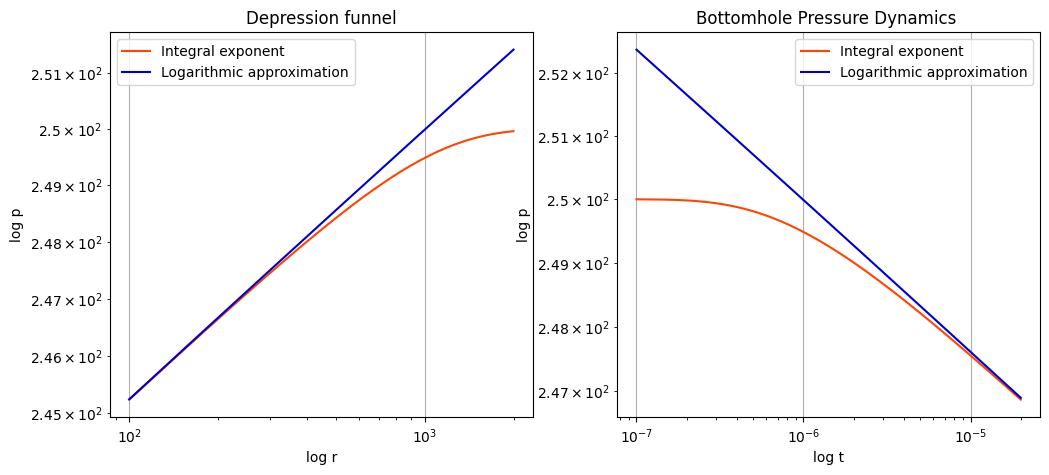

In [54]:
rr=np.arange(100,2000,1)
tt = np.arange(0.0000001, 0.00002, 1e-8)
plt.rcParams['figure.figsize'] = [12, 5]

fig, (ax1, ax2) = plt.subplots(1,2)

#Graph for the depression funnel
ax1.plot(rr, pd(r_m = rr), label = 'Integral exponent', color = 'orangered')
ax1.plot(rr, pd_log(r_m = rr), label = 'Logarithmic approximation', color = 'mediumblue')
ax1.set(title='Depression funnel')
ax1.set_xlabel("log r")
ax1.set_ylabel("log p")
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend()
ax1.grid()

#Graph for downhole pressure dynamics
ax2.plot(tt, pd(t=tt), label = 'Integral exponent', color = 'orangered')
ax2.plot(tt, pd_log(t=tt), label = 'Logarithmic approximation', color = 'mediumblue')
ax2.set(title="Bottomhole Pressure Dynamics ")
ax2.set_xlabel("log t")
ax2.set_ylabel("log p")
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.legend()
ax2.grid()

plt.show()

It can be seen from the plotted graphs that the logarithmic approximation of the linear flow solution can be applicable for small values of radii:
$$r < 200 \text { m}$$
and for values of time:
$$t < 10^{-5} \text { s}$$

## Advanced solutions to the filtration equations <a class="anchor" id="part3"></a>

**General solution of the filtration equation in Laplace space**

The solution of such an equation can be obtained using the Laplace transform.

$$ L \left [ f(t) \right] = \tilde{f}(s) = \int_{0}^{\infty}f(t)e^{-st}dt $$

where $s$ is the parameter of Laplace space corresponding to time

**The solution for the finite radius of the well in Laplace space** will have the following form


$$ \tilde{p}_D(s) = \frac{1}{s^{\frac{3}{2}}} \frac{ K_0 \left( r_D \sqrt s \right)}{K_1 \left( \sqrt s \right)} $$

where $K_0$, $K_1$ are modified Bessel functions

**The solution considering finite radius, skin factor and flowback** can be represented as:

$$
\tilde{p}_{wbD}(s) = \frac{1}{s} \left[ \frac{S + s \tilde{p}_D(r_d=1,s) }{1 + s C_D (S + s \tilde{p}_D(r_d=1,s))} \right]
$$

In [55]:
# finite radius well solution in Laplace space for the case of constant flow rate
def pd_rw_lapl(s, rd=1):
  return 1/s**(3/2) * besselk(0, rd*s**0.5) / besselk(1, s**0.5)

In [56]:
# solution of a linear stack in Laplace space
def pd_ws_lapl(s, S, Cd):
  return 1 / s * (S + s * pd_rw_lapl(s)) / (1 + s * Cd * (S + s * pd_rw_lapl(s)))

In [57]:
# realization of the function for calculating dimensionless pressure based on the Laplace transform
def pd_wbs_lapl(rd, td, S =0 , Cd = 0):
  fp = lambda p: pd_ws_lapl(p, S, Cd)
  return invertlaplace(fp, td, method='stehfest', degree = 5)

pd_wbs_func = np.vectorize(pd_wbs_lapl)

In [58]:
def Dp (p_res_atma = 300,
       q_liq_sm3day = 50,
       mu_cP = 1,
       B_m3m3 = 1.2,
       k_mD = 40,
       h_m = 10,
       pd=100):

  return  pd / (h_m * k_mD / 18.41 / q_liq_sm3day / mu_cP / B_m3m3)

def t(tdd=10,
       r_w = 0.1,
       mu_cP = 1,
       k_mD = 40,
       phi=0.2,
       ct=10**(-5)):

  return  tdd * r_w**2 * ct * mu_cP * phi / 0.00036 / k_mD

### Graphs of reservoir depression and logarithmic derivative of depression

#### 1) from skin factor values

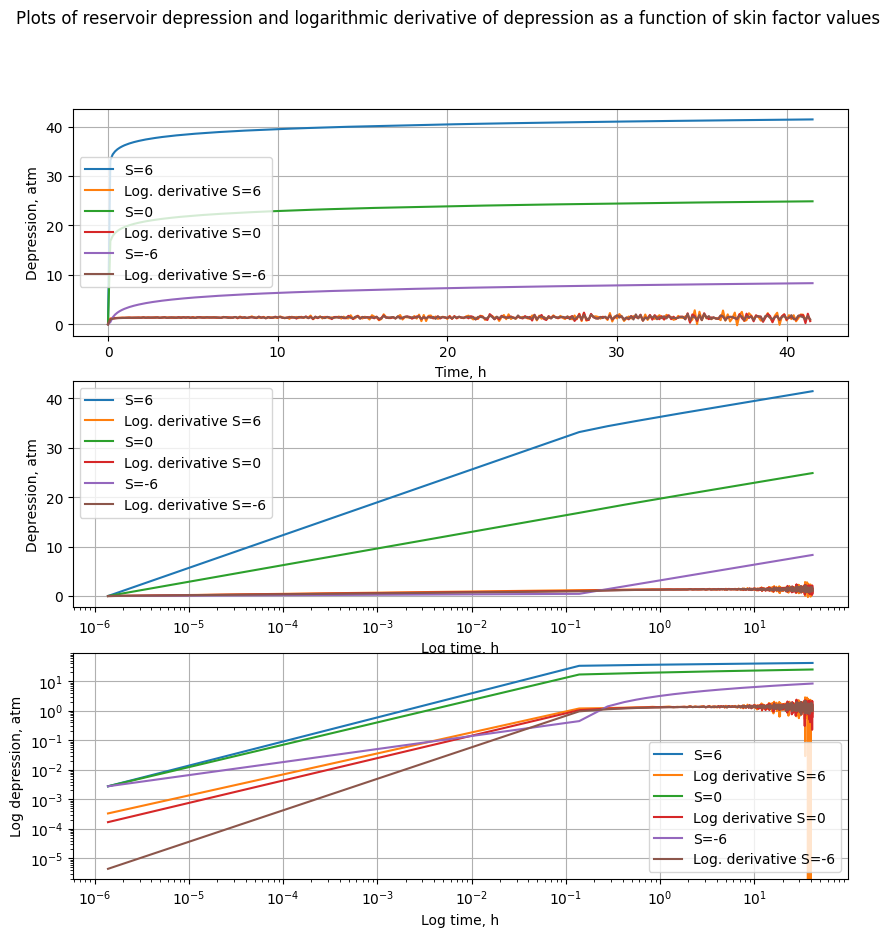

In [59]:
#Depression and logarithmic derivative of depression
#Skin factor values are changed when Cd=10000

plt.rcParams['figure.figsize'] = [10, 10]
fig, axs = plt.subplots(3)
fig.suptitle('Plots of reservoir depression and logarithmic derivative of depression as a function of skin factor values')

t_d = np.arange(1, 3e7, 1e5)
r_d = 1
S = 6
C_d = 1000

t_1 = t(tdd=t_d)

p_d_2 = pd_wbs_func(r_d, t_d, S, C_d)
axs[0].plot(t(tdd=t_d), Dp(pd=p_d_2), label='S=6')
axs[1].plot(t(tdd=t_d), Dp(pd=p_d_2), label='S=6')
axs[2].plot(t(tdd=t_d), Dp(pd=p_d_2), label='S=6')
axs[0].plot(t_1[:-1], np.diff(Dp(pd=p_d_2))/np.diff(t_1)*t_1[:-1], label='Log. derivative S=6')
axs[1].plot(t_1[:-1], np.diff(Dp(pd=p_d_2))/np.diff(t_1)*t_1[:-1], label='Log. derivative S=6')
axs[2].plot(t_1[:-1], np.diff(Dp(pd=p_d_2))/np.diff(t_1)*t_1[:-1], label='Log derivative S=6')

p_d_2 = pd_wbs_func(r_d, t_d, S*0, C_d)
axs[0].plot(t(tdd=t_d), Dp(pd=p_d_2), label='S=0')
axs[0].plot(t_1[:-1], np.diff(Dp(pd=p_d_2))/np.diff(t_1)*t_1[:-1], label='Log. derivative S=0')
axs[1].plot(t(tdd=t_d), Dp(pd=p_d_2), label='S=0')
axs[1].plot(t_1[:-1], np.diff(Dp(pd=p_d_2))/np.diff(t_1)*t_1[:-1], label='Log. derivative S=0')
axs[2].plot(t(tdd=t_d), Dp(pd=p_d_2), label='S=0')
axs[2].plot(t_1[:-1], np.diff(Dp(pd=p_d_2))/np.diff(t_1)*t_1[:-1], label='Log derivative S=0')

p_d_2 = pd_wbs_func(r_d, t_d, S*(-1), C_d)
axs[0].plot(t(tdd=t_d), Dp(pd=p_d_2), label='S=-6')
axs[0].plot(t_1[:-1], np.diff(Dp(pd=p_d_2))/np.diff(t_1)*t_1[:-1], label='Log. derivative S=-6')
axs[1].plot(t(tdd=t_d), Dp(pd=p_d_2), label='S=-6')
axs[1].plot(t_1[:-1], np.diff(Dp(pd=p_d_2))/np.diff(t_1)*t_1[:-1], label='Log. derivative S=-6')
axs[2].plot(t(tdd=t_d), Dp(pd=p_d_2), label='S=-6')
axs[2].plot(t_1[:-1], np.diff(Dp(pd=p_d_2))/np.diff(t_1)*t_1[:-1], label='Log. derivative S=-6')


axs[0].set_xlabel('Time, h')
axs[0].grid()
axs[0].set_ylabel('Depression, atm')
axs[0].legend()

axs[1].set_xlabel('Log time, h')
axs[1].grid()
axs[1].set_ylabel('Depression, atm')
axs[1].set_xscale('log')
axs[1].legend()

axs[2].set_xlabel('Log time, h')
axs[2].grid()
axs[2].set_ylabel('Log depression, atm')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].legend()

fig.show()

#### 2) from the permeability coefficient

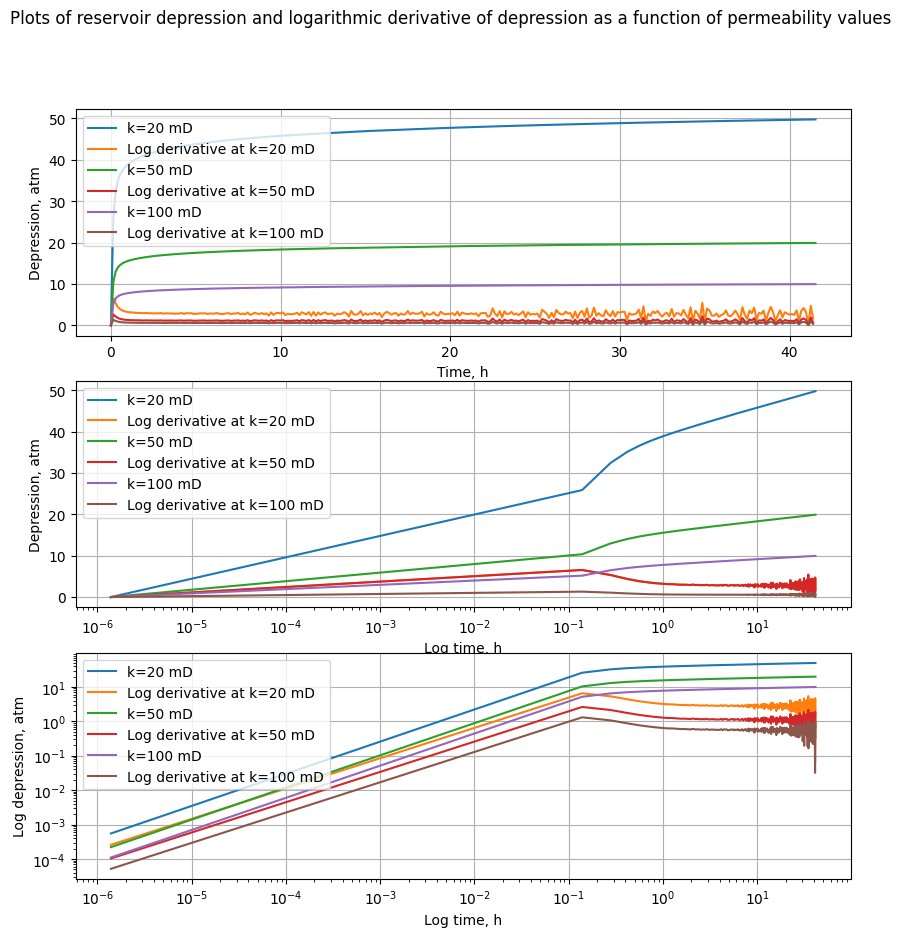

In [60]:
#Values of permeability are changed at Cd=10000 and S=0

plt.rcParams['figure.figsize'] = [10, 10]
fig, axs = plt.subplots(3)
fig.suptitle('Plots of reservoir depression and logarithmic derivative of depression as a function of permeability values')

t_d = np.arange(1, 3e7, 1e5)
r_d = 1
S = 0
C_d = 10000

t_1 = t(tdd=t_d)

p_d_2 = pd_wbs_func(r_d, t_d, S, C_d)
axs[0].plot(t(tdd=t_d), Dp(pd=p_d_2, k_mD=20), label='k=20 mD')
axs[0].plot(t_1[:-1], np.diff(Dp(pd=p_d_2,k_mD=20))/np.diff(t_1)*t_1[:-1], label='Log derivative at k=20 mD')
axs[1].plot(t(tdd=t_d), Dp(pd=p_d_2,k_mD=20), label='k=20 mD')
axs[1].plot(t_1[:-1], np.diff(Dp(pd=p_d_2,k_mD=20))/np.diff(t_1)*t_1[:-1], label='Log derivative at k=20 mD')
axs[2].plot(t(tdd=t_d), Dp(pd=p_d_2,k_mD=20), label='k=20 mD')
axs[2].plot(t_1[:-1], np.diff(Dp(pd=p_d_2,k_mD=20))/np.diff(t_1)*t_1[:-1], label='Log derivative at k=20 mD')

p_d_2 = pd_wbs_func(r_d, t_d, S, C_d)
axs[0].plot(t(tdd=t_d), Dp(pd=p_d_2, k_mD=50), label='k=50 mD')
axs[0].plot(t_1[:-1], np.diff(Dp(pd=p_d_2,k_mD=50))/np.diff(t_1)*t_1[:-1], label='Log derivative at k=50 mD')
axs[1].plot(t(tdd=t_d), Dp(pd=p_d_2,k_mD=50), label='k=50 mD')
axs[1].plot(t_1[:-1], np.diff(Dp(pd=p_d_2,k_mD=20))/np.diff(t_1)*t_1[:-1], label='Log derivative at k=50 mD')
axs[2].plot(t(tdd=t_d), Dp(pd=p_d_2,k_mD=50), label='k=50 mD')
axs[2].plot(t_1[:-1], np.diff(Dp(pd=p_d_2,k_mD=50))/np.diff(t_1)*t_1[:-1], label='Log derivative at k=50 mD')

p_d_2 = pd_wbs_func(r_d, t_d, S, C_d)
axs[0].plot(t(tdd=t_d), Dp(pd=p_d_2, k_mD=100), label='k=100 mD')
axs[0].plot(t_1[:-1], np.diff(Dp(pd=p_d_2,k_mD=100))/np.diff(t_1)*t_1[:-1], label='Log derivative at k=100 mD')
axs[1].plot(t(tdd=t_d), Dp(pd=p_d_2,k_mD=100), label='k=100 mD')
axs[1].plot(t_1[:-1], np.diff(Dp(pd=p_d_2,k_mD=100))/np.diff(t_1)*t_1[:-1], label='Log derivative at k=100 mD')
axs[2].plot(t(tdd=t_d), Dp(pd=p_d_2,k_mD=100), label='k=100 mD')
axs[2].plot(t_1[:-1], np.diff(Dp(pd=p_d_2,k_mD=100))/np.diff(t_1)*t_1[:-1], label='Log derivative at k=100 mD')


axs[0].set_xlabel('Time, h')
axs[0].grid()
axs[0].set_ylabel('Depression, atm')
axs[0].legend()

axs[1].set_xlabel('Log time, h')
axs[1].grid()
axs[1].set_ylabel('Depression, atm')
axs[1].set_xscale('log')
axs[1].legend()

axs[2].set_xlabel('Log time, h')
axs[2].grid()
axs[2].set_ylabel('Log depression, atm')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].legend()

fig.show()

#### 3) from the flowback coefficient

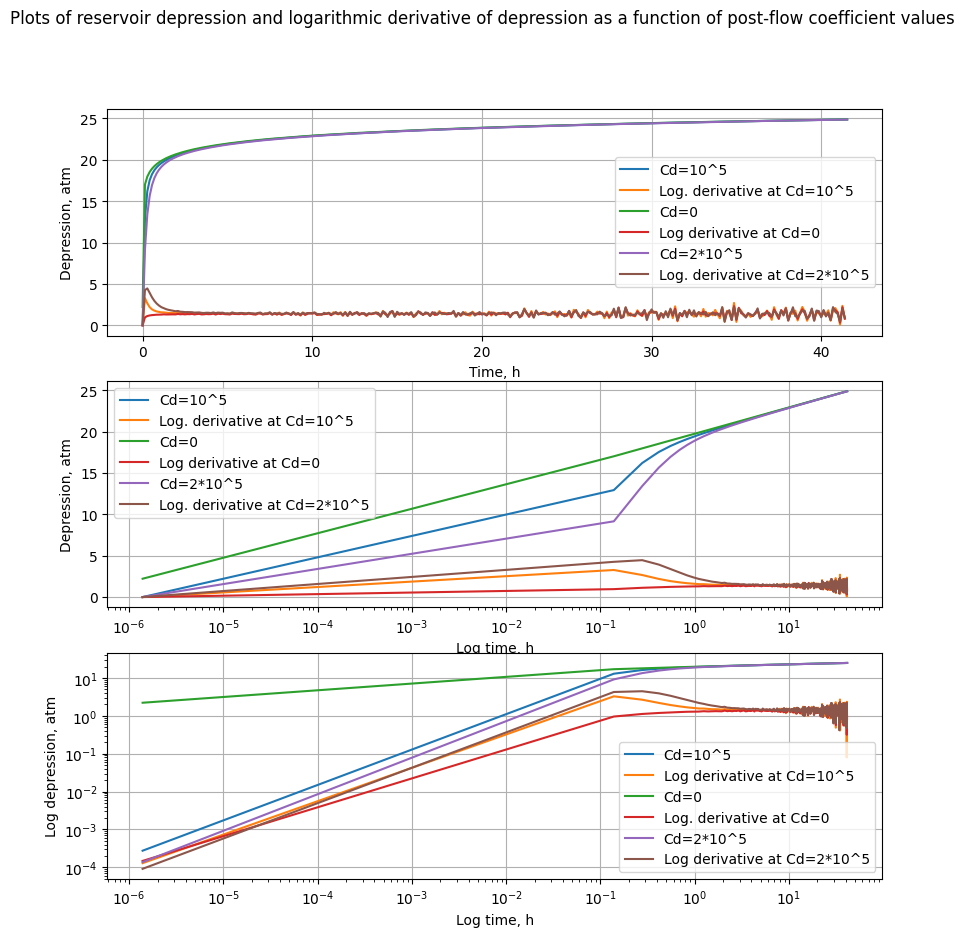

In [61]:
#Values of the after-flow coefficient at S=0 are changed

plt.rcParams['figure.figsize'] = [10, 10]
fig, axs = plt.subplots(3)
fig.suptitle('Plots of reservoir depression and logarithmic derivative of depression as a function of post-flow coefficient values')

t_d = np.arange(1, 3e7, 1e5)
r_d = 1
S = 0
C_d = 10000

t_1 = t(tdd=t_d)

p_d_2 = pd_wbs_func(r_d, t_d, S, C_d)
axs[0].plot(t(tdd=t_d), Dp(pd=p_d_2), label='Cd=10^5')
axs[0].plot(t_1[:-1], np.diff(Dp(pd=p_d_2))/np.diff(t_1)*t_1[:-1], label='Log. derivative at Cd=10^5')
axs[1].plot(t(tdd=t_d), Dp(pd=p_d_2), label='Cd=10^5')
axs[1].plot(t_1[:-1], np.diff(Dp(pd=p_d_2))/np.diff(t_1)*t_1[:-1], label='Log. derivative at Cd=10^5')
axs[2].plot(t(tdd=t_d), Dp(pd=p_d_2), label='Cd=10^5')
axs[2].plot(t_1[:-1], np.diff(Dp(pd=p_d_2))/np.diff(t_1)*t_1[:-1], label='Log derivative at Cd=10^5')


p_d_2 = pd_wbs_func(r_d, t_d, S, C_d*0)
axs[0].plot(t(tdd=t_d), Dp(pd=p_d_2), label='Cd=0')
axs[0].plot(t_1[:-1], np.diff(Dp(pd=p_d_2))/np.diff(t_1)*t_1[:-1], label='Log derivative at Cd=0')
axs[1].plot(t(tdd=t_d), Dp(pd=p_d_2), label='Cd=0')
axs[1].plot(t_1[:-1], np.diff(Dp(pd=p_d_2))/np.diff(t_1)*t_1[:-1], label='Log derivative at Cd=0')
axs[2].plot(t(tdd=t_d), Dp(pd=p_d_2), label='Cd=0')
axs[2].plot(t_1[:-1], np.diff(Dp(pd=p_d_2))/np.diff(t_1)*t_1[:-1], label='Log. derivative at Cd=0')

p_d_2 = pd_wbs_func(r_d, t_d, S, C_d*2)
axs[0].plot(t(tdd=t_d), Dp(pd=p_d_2), label='Cd=2*10^5')
axs[0].plot(t_1[:-1], np.diff(Dp(pd=p_d_2))/np.diff(t_1)*t_1[:-1], label='Log. derivative at Cd=2*10^5')
axs[1].plot(t(tdd=t_d), Dp(pd=p_d_2), label='Cd=2*10^5')
axs[1].plot(t_1[:-1], np.diff(Dp(pd=p_d_2))/np.diff(t_1)*t_1[:-1], label='Log. derivative at Cd=2*10^5')
axs[2].plot(t(tdd=t_d), Dp(pd=p_d_2), label='Cd=2*10^5')
axs[2].plot(t_1[:-1], np.diff(Dp(pd=p_d_2))/np.diff(t_1)*t_1[:-1], label='Log derivative at Cd=2*10^5')


axs[0].set_xlabel('Time, h')
axs[0].grid()
axs[0].set_ylabel('Depression, atm')
axs[0].legend()

axs[1].set_xlabel('Log time, h')
axs[1].grid()
axs[1].set_ylabel('Depression, atm')
axs[1].set_xscale('log')
axs[1].legend()

axs[2].set_xlabel('Log time, h')
axs[2].grid()
axs[2].set_ylabel('Log depression, atm')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].legend()

fig.show()

#### 4) from fluid and rock compressibility (total compressibility)

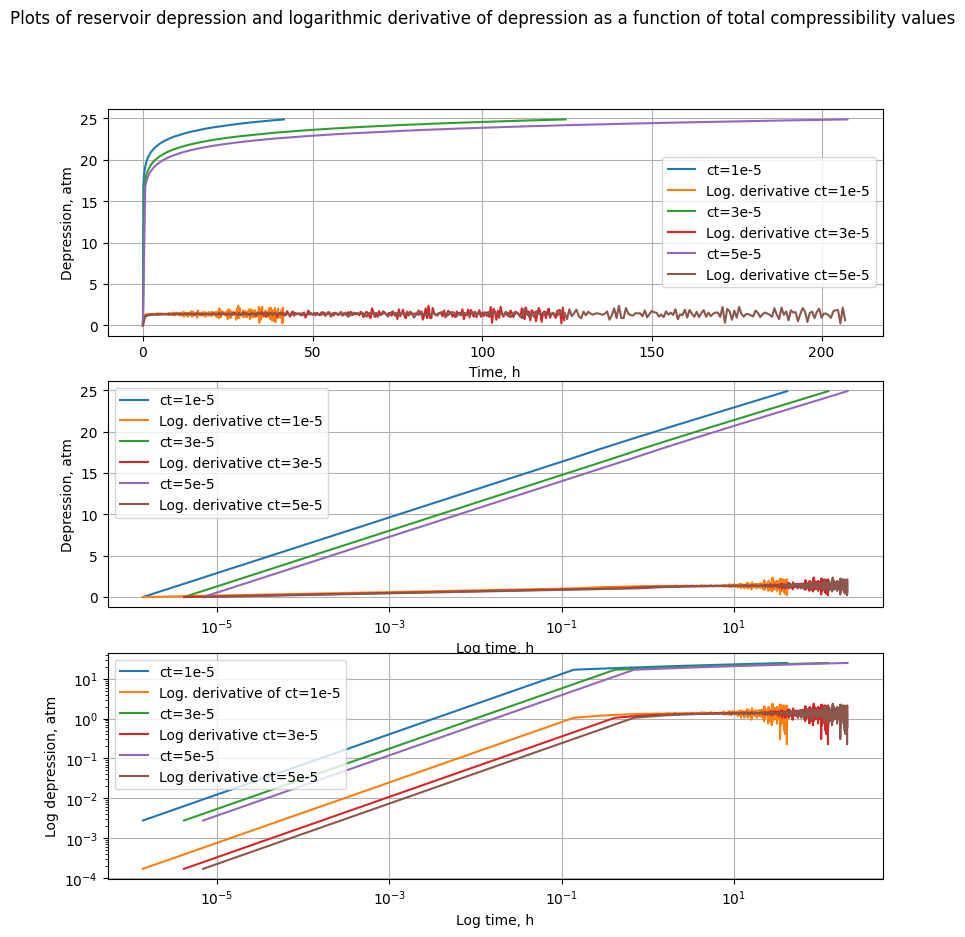

In [62]:
#Compressibility values are changed when Cd=1000 and S=0

plt.rcParams['figure.figsize'] = [10, 10]
fig, axs = plt.subplots(3)
fig.suptitle('Plots of reservoir depression and logarithmic derivative of depression as a function of total compressibility values')

t_d = np.arange(1, 3e7, 1e5)
r_d = 1
S = 0
C_d = 1000


p_d_2 = pd_wbs_func(r_d, t_d, S, C_d)
t_1 = t(tdd=t_d,ct=1e-5)
axs[0].plot(t(tdd=t_d,ct=1e-5), Dp(pd=p_d_2), label='ct=1e-5')
axs[0].plot(t_1[:-1], np.diff(Dp(pd=p_d_2))/np.diff(t_1)*t_1[:-1], label='Log. derivative ct=1e-5')
axs[1].plot(t(tdd=t_d,ct=1e-5), Dp(pd=p_d_2), label='ct=1e-5')
axs[1].plot(t_1[:-1], np.diff(Dp(pd=p_d_2))/np.diff(t_1)*t_1[:-1], label='Log. derivative ct=1e-5')
axs[2].plot(t(tdd=t_d,ct=1e-5), Dp(pd=p_d_2), label='ct=1e-5')
axs[2].plot(t_1[:-1], np.diff(Dp(pd=p_d_2))/np.diff(t_1)*t_1[:-1], label='Log. derivative of ct=1e-5')


p_d_2 = pd_wbs_func(r_d, t_d, S, C_d)
t_1 = t(tdd=t_d,ct=3e-5)
axs[0].plot(t(tdd=t_d,ct=3e-5), Dp(pd=p_d_2), label='ct=3e-5')
axs[1].plot(t(tdd=t_d,ct=3e-5), Dp(pd=p_d_2), label='ct=3e-5')
axs[2].plot(t(tdd=t_d,ct=3e-5), Dp(pd=p_d_2), label='ct=3e-5')
axs[0].plot(t_1[:-1], np.diff(Dp(pd=p_d_2))/np.diff(t_1)*t_1[:-1], label='Log. derivative ct=3e-5')
axs[1].plot(t_1[:-1], np.diff(Dp(pd=p_d_2))/np.diff(t_1)*t_1[:-1], label='Log. derivative ct=3e-5')
axs[2].plot(t_1[:-1], np.diff(Dp(pd=p_d_2))/np.diff(t_1)*t_1[:-1], label='Log derivative ct=3e-5')

p_d_2 = pd_wbs_func(r_d, t_d, S, C_d)
t_1 = t(tdd=t_d,ct=5e-5)
axs[0].plot(t(tdd=t_d,ct=5e-5), Dp(pd=p_d_2), label='ct=5e-5')
axs[1].plot(t(tdd=t_d,ct=5e-5), Dp(pd=p_d_2), label='ct=5e-5')
axs[2].plot(t(tdd=t_d,ct=5e-5), Dp(pd=p_d_2), label='ct=5e-5')
axs[0].plot(t_1[:-1], np.diff(Dp(pd=p_d_2))/np.diff(t_1)*t_1[:-1], label='Log. derivative ct=5e-5')
axs[1].plot(t_1[:-1], np.diff(Dp(pd=p_d_2))/np.diff(t_1)*t_1[:-1], label='Log. derivative ct=5e-5')
axs[2].plot(t_1[:-1], np.diff(Dp(pd=p_d_2))/np.diff(t_1)*t_1[:-1], label='Log derivative ct=5e-5')

axs[0].set_xlabel('Time, h')
axs[0].grid()
axs[0].set_ylabel('Depression, atm')
axs[0].legend()

axs[1].set_xlabel('Log time, h')
axs[1].grid()
axs[1].set_ylabel('Depression, atm')
axs[1].set_xscale('log')
axs[1].legend()

axs[2].set_xlabel('Log time, h')
axs[2].grid()
axs[2].set_ylabel('Log depression, atm')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].legend()

fig.show()